# EXERCICE 5 : Analyse ANOVA
inspire de  https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/

## 1) INIT

In [2]:
#1.1) Importe les modules matplotlib (pour la visualisation de graphes) et pandas (pour la manipulation de donnees)
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [27]:
#1.2) charge les donnees
data = pd.read_csv("data/PlantGrowth.csv")
data

,Unnamed: 0,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


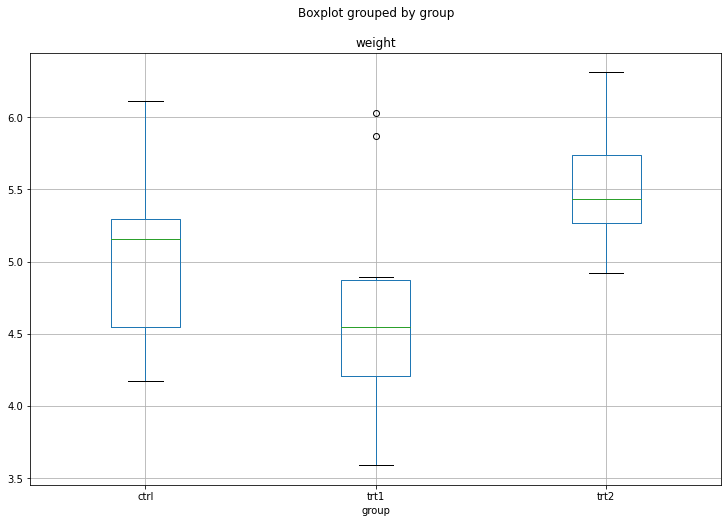

In [10]:
#1.3) represente un resume des données (necessite d'avoir appele matplotlib)
data.boxplot('weight', by='group', figsize=(12, 8))
plt.show()

### QUESTION 1 : 
- Que signifient les box-plots (ou boite a moustache) ? 

The box extends from the Q1 to Q3 quartile values of the data,
with a line at the median (Q2). The whiskers extend from the edges
of box to show the range of the data. By default, they extend no more than
`1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
data point within that interval. Outliers are plotted as separate dots.

- Vous pouvez taper 'data.boxplot?' pour des informations elementaires

In [11]:
?data.boxplot

Signature:
data.boxplot(
    column=None,
    by=None,
    ax=None,
    fontsize=None,
    rot=0,
    grid=True,
    figsize=None,
    layout=None,
    return_type=None,
    backend=None,
    **kwargs,
)
Docstring:
Make a box plot from DataFrame columns.

Make a box-and-whisker plot from DataFrame columns, optionally grouped
by some other columns. A box plot is a method for graphically depicting
groups of numerical data through their quartiles.
The box extends from the Q1 to Q3 quartile values of the data,
with a line at the median (Q2). The whiskers extend from the edges
of box to show the range of the data. By default, they extend no more than
`1.5 * IQR (IQR = Q3 - Q1)` from the edges of the box, ending at the farthest
data point within that interval. Outliers are plotted as separate dots.

For further details see
Wikipedia&#39;s entry for `boxplot &lt;https://en.wikipedia.org/wiki/Box_plot&gt;`_.

Parameters
----------
column : str or list of str, optional
    Column name or list o

- Les groupes vous semblent-il distribues de maniere similaire ?

In [12]:
# Non

- Les variabilités intra-groupe vous semblent-t-elles similaires ?

In [13]:
# Non

## 2) STATISTIQUE DE FISHER


In [19]:
grps = pd.unique(data.group.values)
d_data = {grp: data['weight'][data.group == grp] for grp in grps}
 
k = len(grps)  # nombre de groupes
N = len(data.values)  # nombre d'observations
n = data.groupby('group').size()[0] #nombre d'observations dans chaque groupe (on remarque que tous les groupes on la meme taille)

#calcule la variabilite due aux interactions entre groupes (Sum of Squares Between)
SSbetween = (sum(data.groupby('group').sum()['weight']**2)/n)- (data['weight'].sum()**2)/N

#calcule la variabilite due aux differences entre les observations (Sum of Squares Within)
sum_y_squared = sum([value**2 for value in data['weight'].values])
SSwithin = sum_y_squared - sum(data.groupby('group').sum()['weight']**2)/n

#calcule la variabilite totale (Sum of Squares Total)
SStotal = sum_y_squared - (data['weight'].sum()**2)/N

#defini les degres de liberte
DFbetween = k - 1
DFwithin = N - k
DFtotal = N - 1

#calcule la statistique de Fisher
MSbetween = SSbetween/DFbetween
MSwithin = SSwithin/DFwithin

F = MSbetween/MSwithin
print(f"{F=}")

p = stats.f.sf(F, DFbetween, DFwithin)
print(f"{p=}")

F=4.846087862380118
p=0.015909958325623124


### QUESTION 2 : Faire le lien avec la section 4.3 du cours pour comprendre ce que signifie p.

In [ ]:
# p est l'intervalle de confiance qui rejette l'hyp les groupes soont les memes

### QUESTION 3 : Adapter ce code pour etudier la colonne 'f2' des donnees IRIS de 'DataIris.csv'.

In [28]:
data_iris = pd.read_csv("data/DataIris.csv")
data_iris.head()

,f1,f2,f3,f4,IRIS_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


&lt;AxesSubplot:&gt;

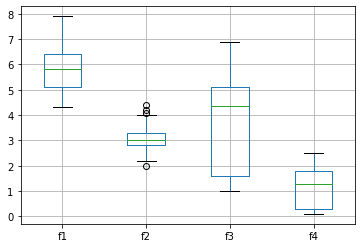

In [29]:
data_iris.boxplot()

In [50]:
def fisher(data, val_colname, grp_colname):
    grps = pd.unique(data[grp_colname].values)
    d_data = {grp: data[val_colname][data[grp_colname] == grp] for grp in grps}
    
    k = len(grps)  # nombre de groupes
    N = len(data.values)  # nombre d'observations
    n = data.groupby(grp_colname).size()[0] #nombre d'observations dans chaque groupe (on remarque que tous les groupes on la meme taille)

    #calcule la variabilite due aux interactions entre groupes (Sum of Squares Between)
    SSbetween = (sum(data.groupby(grp_colname).sum()[val_colname]**2)/n)- (data[val_colname].sum()**2)/N

    #calcule la variabilite due aux differences entre les observations (Sum of Squares Within)
    sum_y_squared = sum([value**2 for value in data[val_colname].values])
    SSwithin = sum_y_squared - sum(data.groupby(grp_colname).sum()[val_colname]**2)/n

    #calcule la variabilite totale (Sum of Squares Total)
    SStotal = sum_y_squared - (data[val_colname].sum()**2)/N

    #defini les degres de liberte
    DFbetween = k - 1
    DFwithin = N - k
    DFtotal = N - 1

    #calcule la statistique de Fisher
    MSbetween = SSbetween/DFbetween
    MSwithin = SSwithin/DFwithin

    F = MSbetween/MSwithin
    print(f"{F=}")

    p = stats.f.sf(F, DFbetween, DFwithin)
    print(f"{p=}")

    kruskal = stats.kruskal(*d_data.values())
    print(f"{kruskal=}")


In [52]:
# test fct on Plant data
fisher(data, 'weight', 'group')

F=4.846087862380118
p=0.015909958325623124
kruskal=KruskalResult(statistic=7.988228749443715, pvalue=0.018423755731471966)


In [51]:
# Apply fisher on 'f2' of iris data
fisher(data_iris, 'f2', 'IRIS_type')

F=47.36446140299812
p=1.3279165184537495e-16
kruskal=KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)


### QUESTION 4 : 
- Est-ce qu'un test non-parametrique de kruskal wallis mene aux mêmes conclusions ?
- Utiliser la fonction scipy.stats.kruskal


In [53]:
?stats.kruskal

Signature: stats.kruskal(*args, **kwargs)
Docstring:
Compute the Kruskal-Wallis H-test for independent samples.

The Kruskal-Wallis H-test tests the null hypothesis that the population
median of all of the groups are equal.  It is a non-parametric version of
ANOVA.  The test works on 2 or more independent samples, which may have
different sizes.  Note that rejecting the null hypothesis does not
indicate which of the groups differs.  Post hoc comparisons between
groups are required to determine which groups are different.

Parameters
----------
sample1, sample2, ... : array_like
   Two or more arrays with the sample measurements can be given as
   arguments.
nan_policy : {&#39;propagate&#39;, &#39;raise&#39;, &#39;omit&#39;}, optional
    Defines how to handle when input contains nan.
    The following options are available (default is &#39;propagate&#39;):

      * &#39;propagate&#39;: returns nan
      * &#39;raise&#39;: throws an error
      * &#39;omit&#39;: performs the calculation

In [54]:
# Apply fisher on 'f2' of iris data
fisher(data_iris, 'f2', 'IRIS_type')

F=47.36446140299812
p=1.3279165184537495e-16
kruskal=KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)
